<a href="https://colab.research.google.com/github/reesha-rsh/MLb4/blob/main/Homework/Homework_1_0_Numpy_First_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 1. Try to tune learning rate and number of iterations
* What is the lowest error with current approach?*

In [96]:
# Package imports
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import sklearn.datasets

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def dsigmoid(x):
    return x * (1 - x)

def activation(x):
    return np.where( x > 0 , 1, 0)

def perceptron(w, x):
    return activation(np.dot(x, w))

import time
from IPython import display

def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.show()

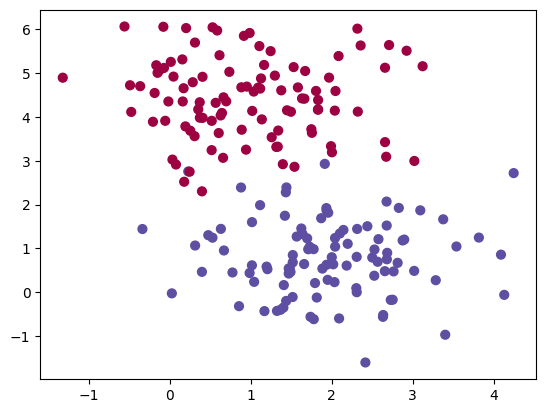

In [2]:
np.random.seed(0)
# X, y = sklearn.datasets.make_moons(200, noise=0.20)
X, y = sklearn.datasets.make_blobs(200, centers=2, cluster_std=0.9)
X[0] += 1.5
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [ ]:
learning_rates = np.arange(0.0001, 2, 0.005 )
learning_rates

In [ ]:
Iterations = np.arange(10, 31, 30)
Iterations

In [ ]:
best_lr = None
best_iteration = None
best_error = float('inf')

for LR in learning_rates:
    for iteration in Iterations:
        w = 2 * np.random.random((2,)) - 1  # Reset weights for each LR and iteration combination
        for j in range(iteration):
          # get preds
          pred = perceptron(w, X)

          # how much did we miss?
          diff = y - pred
          error = np.mean(np.abs(diff))


          # draw result
          display.clear_output(wait=True)
          plot_decision_boundary(lambda x: perceptron(w, x))
          display.display("Current LR:"+str(LR)+"; iteration:"+str(iteration)+"; Error:" + str(error))
          display.display("Best LR:"+str(best_lr)+"; iteration:"+str(iteration)+"; Error:" + str(best_error))
          time.sleep(0.5)

          # update weights
          w = w + LR * np.dot(X.T, diff)

        # Check if this combination has the lowest error so far
        if error < best_error:
            best_error = error
            best_lr = LR
            best_iteration = iteration

print("Best Learning Rate:", best_lr)
print("Best Iterations:", best_iteration)
print("Best Error:", best_error)


Task 1 Answer



*   Best Learning Rate: 1.1600000000000001
*   Best Iterations: 10

*   **Best Error: 0.065**

#### 2. It's time to add learnable bias
* What is the lowest error now?*

In [162]:
# Package imports
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import sklearn.datasets

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def dsigmoid(x):
    return x * (1 - x)

def activation(x):
    return np.where( x > 0 , 1, 0)

def perceptron(w, x):
    return activation(np.dot(x, w))

import time
from IPython import display

def plot_decision_boundary(pred_func, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    y_min, y_max = X[:, 2].min() - .5, X[:, 2].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = pred_func(np.c_[np.ones(xx.ravel().shape[0]), xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 1], X[:, 2], c=y, cmap=plt.cm.Spectral)
    plt.show()

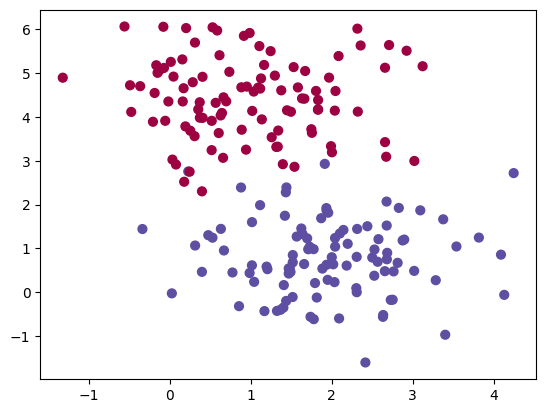

In [163]:
np.random.seed(0)
# X, y = sklearn.datasets.make_moons(200, noise=0.20)
X, y = sklearn.datasets.make_blobs(200, centers=2, cluster_std=0.9)
X[0] += 1.5
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [164]:
bias = np.ones((1, 200))

In [ ]:
bias

In [165]:
bias = bias.reshape(200,1)

In [ ]:
bias

In [ ]:
X = np.hstack((bias,X))
X

In [167]:
# initialize weights randomly with mean 0 - [-1; 1]
w = 2*np.random.random((3,)) - 1

In [ ]:
w.shape

In [ ]:
X.shape

In [ ]:
learning_rates = np.arange(0.00001, 2, 0.005 )
learning_rates

In [ ]:
Iterations = np.arange(10, 31, 30)
Iterations

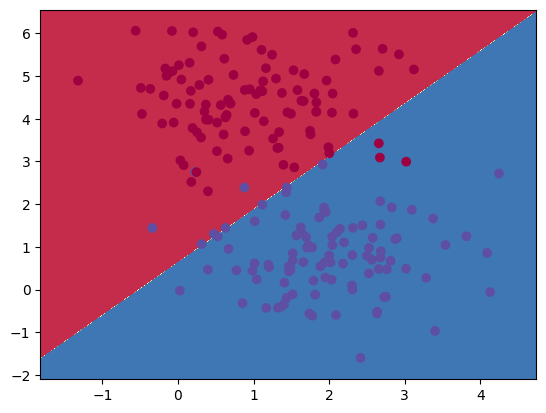

In [ ]:
best_lr = None
best_iteration = None
best_error = float('inf')

for LR in learning_rates:
    for iteration in Iterations:
        w = 2 * np.random.random((3,)) - 1  # Reset weights for each LR and iteration combination
        for j in range(iteration):
          # get preds
          pred = perceptron(w, X)

          # how much did we miss?
          diff = y - pred
          error = np.mean(np.abs(diff))


          # draw result
          display.clear_output(wait=True)
          plot_decision_boundary(lambda x: perceptron(w, x), X, y)
          display.display("Current LR:"+str(LR)+"; iteration:"+str(iteration)+"; Error:" + str(error))
          display.display("Best LR:"+str(best_lr)+"; iteration:"+str(iteration)+"; Error:" + str(best_error))
          time.sleep(0.5)

          # update weights
          w = w + LR * np.dot(X.T, diff)

        # Check if this combination has the lowest error so far
        if error < best_error:
            best_error = error
            best_lr = LR
            best_iteration = iteration

print("Best Learning Rate:", best_lr)
print("Best Iterations:", best_iteration)
print("Best Error:", best_error)


Task 2 Answer



*   Best Learning Rate: 1.1600000000000001
*   Best Iterations: 10

*   **Best Error: 0.035**